In [12]:
# 利用SVD进行矩阵分解
import numpy as np
num_user = 5
num_item = 5
latent = 2 # Embedding维度
# 绘制共现矩阵
Y_gt = np.array([
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 1, 1],
], dtype=np.float)
# 将共现矩阵中的一些数据挖空进行预测变成新矩阵Y
Y = Y_gt.copy()
Y[0, 4] = Y[1, 3] = Y[2, 2] = Y[3, 1] = Y[4, 0] = None
Y_padding = np.nan_to_num(Y, nan=0.5) # 填充为0.5
#SVD分解
U, S, Vh = np.linalg.svd(Y_padding, full_matrices=True)
#奇异值S平分
P = U[:, :latent] * np.sqrt(S[:latent]).reshape(1, -1) # 用户矩阵
Q = Vh[:latent, :] * np.sqrt(S[:latent]).reshape(-1, 1) # 项目矩阵
print('P = \n', np.around(P,3))  # 用户和项目隐向量的几何特征
print('Q = \n', np.around(Q,2))
Y_re = P @ Q # 缺失值估计

P = 
 [[-0.99   0.268]
 [-0.99   0.268]
 [-0.782  0.398]
 [-0.48  -0.879]
 [-0.48  -0.879]]
Q = 
 [[-0.99 -0.99 -0.78 -0.48 -0.48]
 [ 0.27  0.27  0.4  -0.88 -0.88]]


/var/folders/zb/364yznl52m77t2qs4wsb69w40000gn/T/ipykernel_62101/621462627.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ], dtype=np.float)


In [18]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
def show_result(curve, curve_name, Y, Y_re, figname, save=False):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), num=figname)
    axs[0].plot(curve)             
    axs[0].grid()
    axs[0].set_title(curve_name)
    axs[1].imshow(Y, cmap='gray')   # 待预测/填充数据
    axs[1].set_title('待填充数据')
    axs[2].imshow(Y_re, cmap='gray')    # 填充/预测结果
    axs[2].set_title('预测填充')
    for u in range(num_user):
        for i in range(num_item):
            if np.isnan(Y[u,i]):
                axs[1].text(u-0.1, i+0.1, '?', fontsize=20, color='r')
                axs[2].text(u-0.25, i+0.1, '%1.2f'%Y_re[u,i], fontsize=12, color='r')
            else:
                axs[1].text(u-0.2, i+0.1, str(Y[u,i]), fontsize=12, color='g')
                axs[2].text(u-0.25, i+0.1, '%1.2f'%Y_re[u,i], fontsize=12, color='g')
   # if save:
     #   fig.savefig('./image/%s.png'%(figname))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22855 (\N{CJK UNIFIED IDEOGRAPH-5947}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24322 (\N{CJK UNIFIED IDEOGRAPH-5F02}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24453 (\N{CJK UNIFIED IDEOGRAPH-5F85}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Version

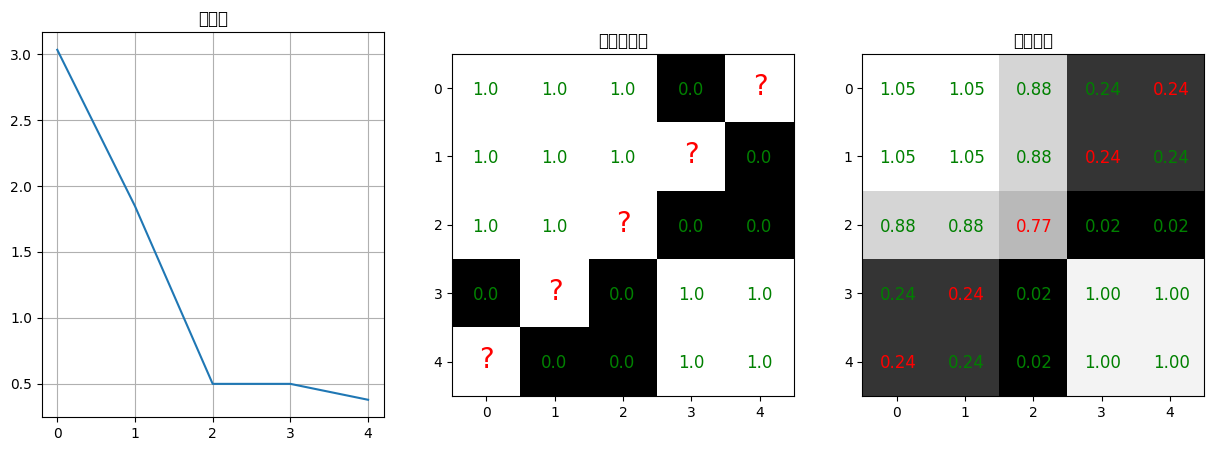

In [19]:
show_result(curve=S, curve_name='奇异值', Y=Y, Y_re=Y_re, figname='SVD', save=True)